In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow import keras
from skimage.transform import resize
from sklearn.metrics import confusion_matrix
from sklearn.utils import shuffle
import glob


In [3]:
with_mask = glob.glob(r"C:\Users\USER\Desktop\ML\afinal\Capstone Project\Capstone Project\Face Mask Detection\with_mask 1\with_mask 1/*.jpg")

In [5]:
without_mask = glob.glob(r"C:\Users\USER\Desktop\ML\afinal\Capstone Project\Capstone Project\Face Mask Detection\without_mask\without_mask/*.jpg")
with_mask_test = glob.glob(r"C:\Users\USER\Desktop\ML\afinal\Capstone Project\Capstone Project\Face Mask Detection\with_mask 1\with mask test/*.jpg")
without_mask_test = glob.glob(r"C:\Users\USER\Desktop\ML\afinal\Capstone Project\Capstone Project\Face Mask Detection\without_mask\with out mask test/*.jpg")

In [7]:
len(with_mask)

806

In [9]:
len(without_mask)

896

In [11]:
len(with_mask_test)

890

In [13]:
len(without_mask_test)

896

In [15]:
#Test Data
image_test = []
label_test = []

for i in with_mask_test:
    img = plt.imread(i)
    image_test.append(img)
    label_test.append(0)

for i in without_mask_test:
    img = plt.imread(i)
    image_test.append(img)
    label_test.append(1)

In [17]:
#Train Data
image = []
label = []

for i in with_mask:
    img = plt.imread(i)
    image.append(img)
    label.append(0)

for i in without_mask:
    img = plt.imread(i)
    image.append(img)
    label.append(1)



In [19]:
#train shuffle

image, label = shuffle(image, label, random_state = 100)

In [21]:
#test_shuffle

image_test, label_test = shuffle(image_test, label_test, random_state = 100)

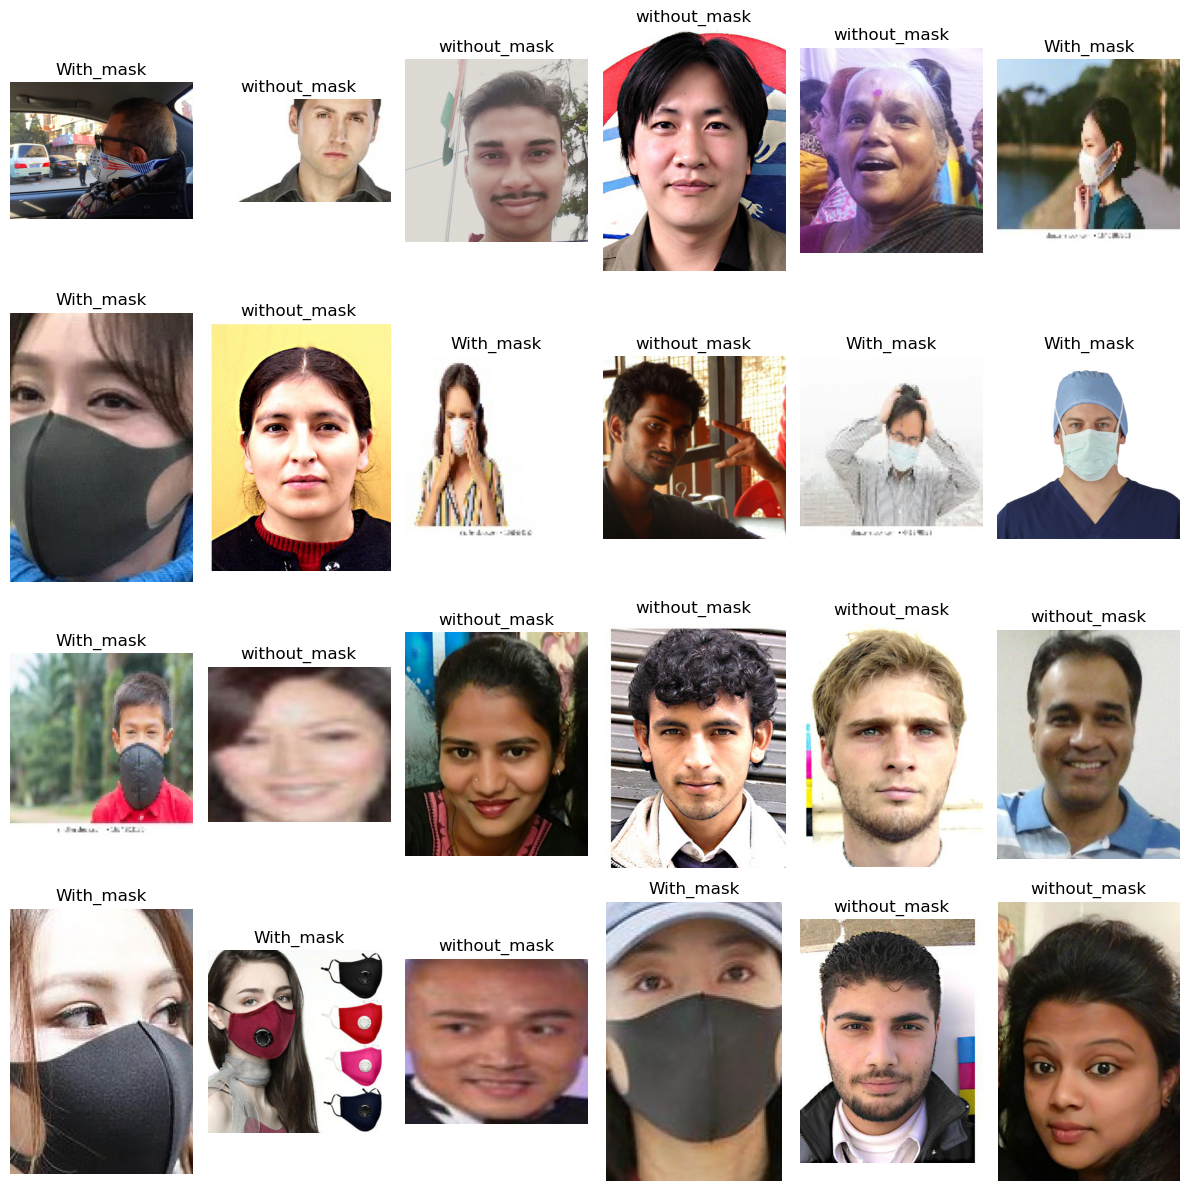

In [25]:
plt.figure(figsize = (12,12))
for i in range (24):
    plt.subplot(4,6,i+1)
    plt.imshow(image[i])
    if label[i] ==1:
        plt.title("without_mask")
    else:
        plt.title('With_mask')
    plt.axis('off')
    plt.tight_layout()

In [29]:
#Train_resize

x_train = []
for i in image:
    x_train.append(resize(i,(64,64,3)))
x_train = np.array(x_train)

In [30]:
#test_resize
x_test = []
for i in image_test:
    x_test.append(resize(i,(64,64,3)))
x_test = np.array(x_test)

In [31]:
y_train = np.array(label)
y_test = np.array(label_test)

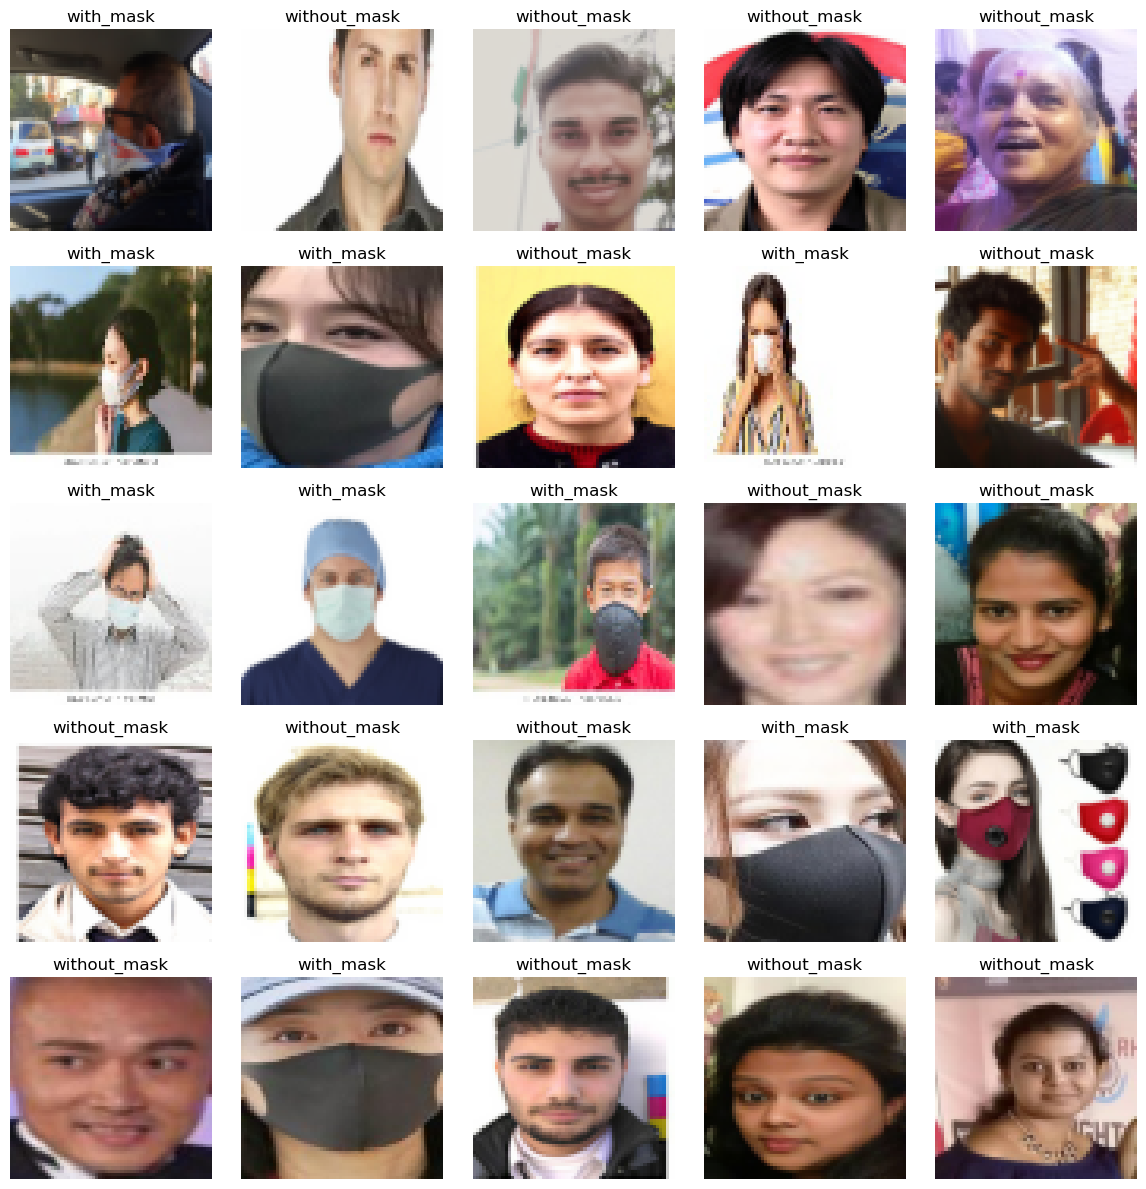

In [35]:
plt.figure(figsize = (12,12))

for i in range (25):
    plt.subplot(5,5,i+1)
    plt.imshow(x_train[i])
    if label[i] ==1:
        plt.title('without_mask')
    else:
        plt.title("with_mask")
    plt.axis('off')
    plt.tight_layout()

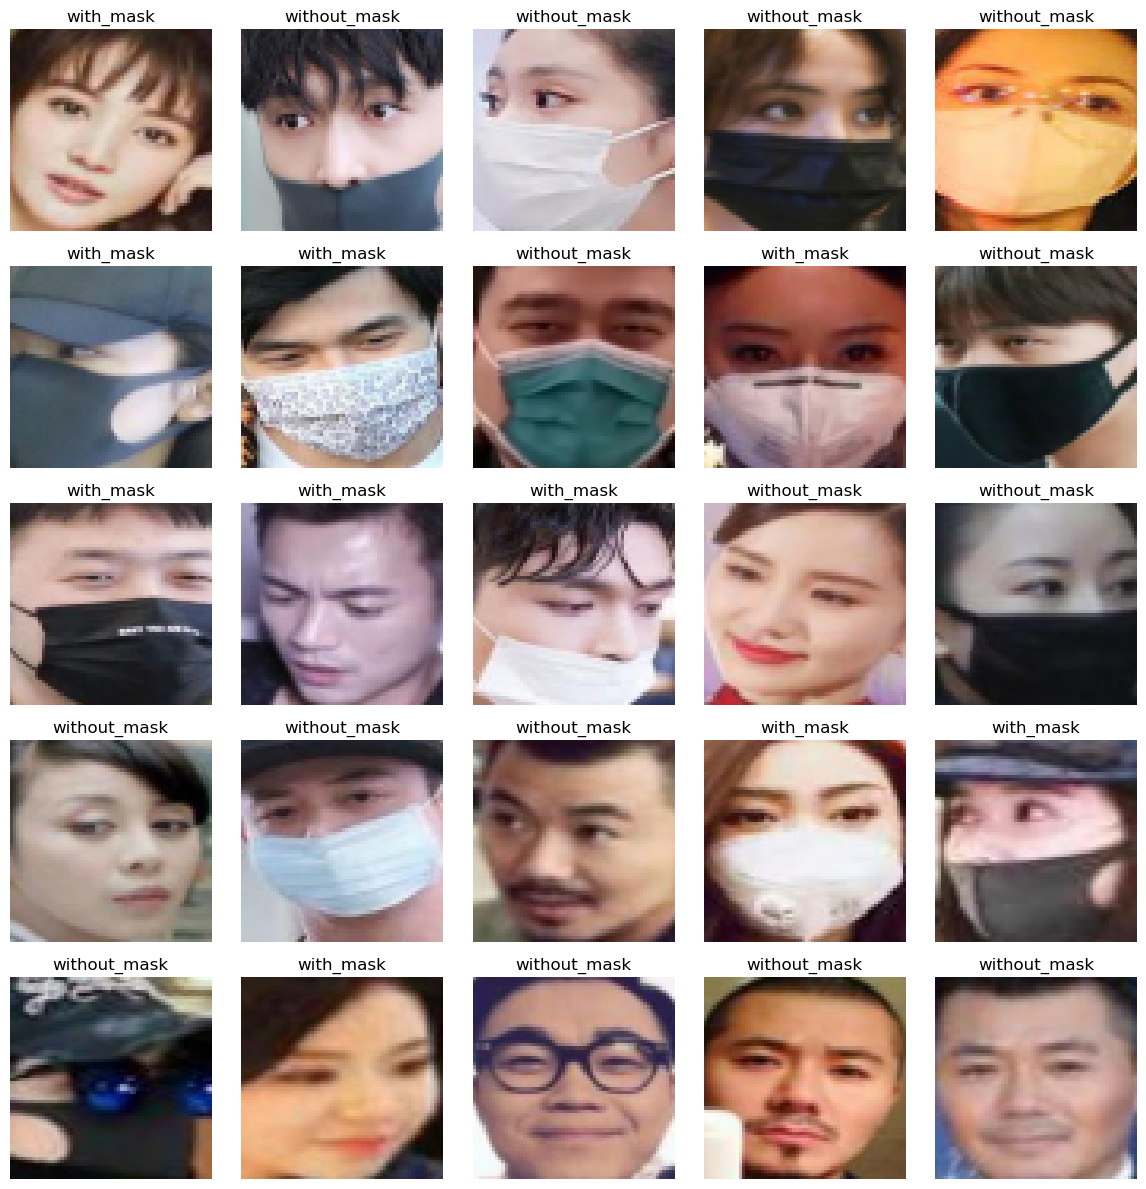

In [37]:
plt.figure(figsize = (12,12))
for i in range (25):
    plt.subplot(5,5,i+1)
    plt.imshow(x_test[i])
    if label[i]==1:
        plt.title('without_mask')
    else:
        plt.title('with_mask')
    plt.axis('off')
    plt.tight_layout()

In [43]:
model = keras.models.Sequential([
    keras.layers.Conv2D(16,(3,3), activation = 'relu', input_shape = (64,64,3)),
    keras.layers.MaxPool2D(2,2),
    keras.layers.Flatten(),
    keras.layers.Dense(64, activation = 'relu'),
    keras.layers.Dense(1, activation = 'sigmoid')

])

In [45]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [47]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_1 (Conv2D)               │ (None, 62, 62, 16)     │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 31, 31, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 15376)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │       984,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 984,641 (3.76 MB)

 Trainable params: 984,641 (3.76 MB)

 Non-trainable params: 0 (0.00 B)

In [49]:
model.fit(x_train,y_train, epochs = 10, validation_split = 0.1)

Epoch 1/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - accuracy: 0.7039 - loss: 0.5724 - val_accuracy: 0.9006 - val_loss: 0.2190
Epoch 2/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.9269 - loss: 0.2189 - val_accuracy: 0.9181 - val_loss: 0.2016
Epoch 3/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.9283 - loss: 0.1938 - val_accuracy: 0.9006 - val_loss: 0.2354
Epoch 4/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.9518 - loss: 0.1481 - val_accuracy: 0.9240 - val_loss: 0.1875
Epoch 5/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.9607 - loss: 0.1247 - val_accuracy: 0.9357 - val_loss: 0.1627
Epoch 6/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.9796 - loss: 0.0754 - val_accuracy: 0.9181 - val_loss: 0.1814
Epoch 7/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.9587 - loss: 0.0992 - val_accuracy: 0.9357 - val_loss: 0.1769
Epoch 8/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.9900 - loss: 0.0434 - val_accuracy: 0.9123 - v

In [51]:
model.evaluate(x_train, y_train)

54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9932 - loss: 0.0275


[0.04579615965485573, 0.9870740175247192]

In [53]:
prediction = model.predict(x_test)

56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


In [55]:
pred = []

for i in prediction:
    if i < 0.5:
        pred.append(0)
    else:
        pred.append(1)

In [57]:
pred

[1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,


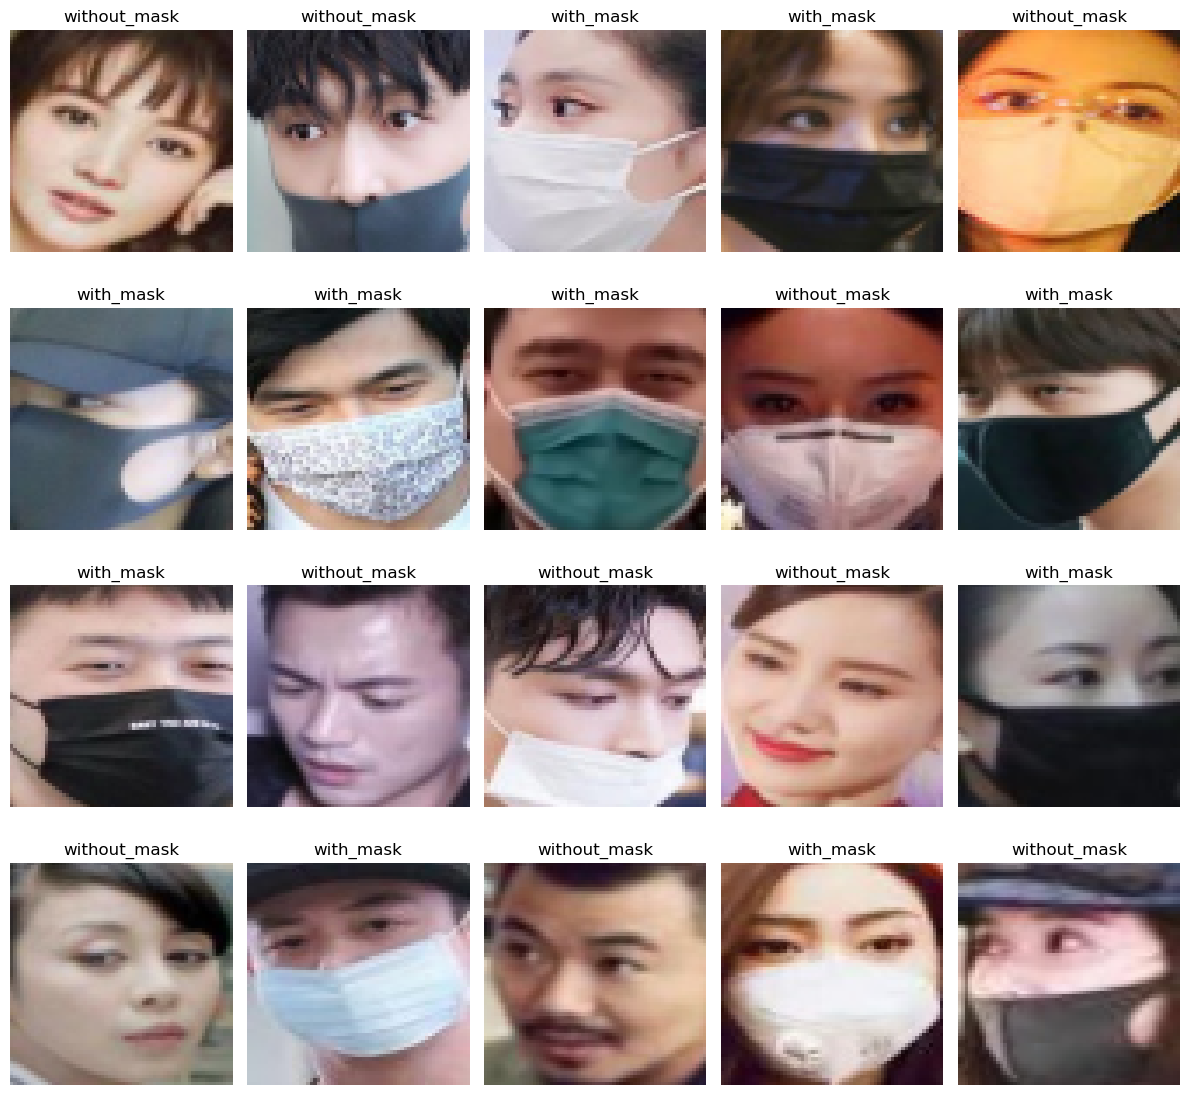

In [59]:
plt.figure(figsize = (12,12))
for i in range (20):
    plt.subplot(4,5,i+1)
    plt.imshow(x_test[i])
    if pred[i] ==0:
        plt.title('with_mask')
    else:
        plt.title('without_mask')
    plt.axis('off')
    plt.tight_layout()
        
        

In [61]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

<Axes: >

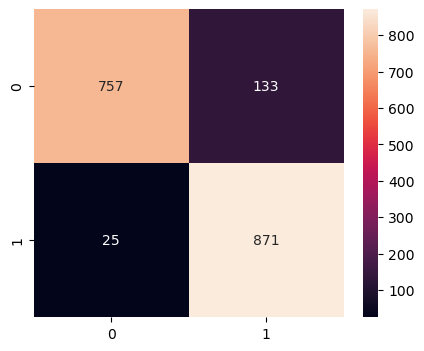

In [66]:
plt.figure(figsize= (5,4))
sns.heatmap(confusion_matrix(y_test,pred), annot = True, fmt = 'd')

In [70]:
print('Classification Report:\n', classification_report(y_test,pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.85      0.91       890
           1       0.87      0.97      0.92       896

    accuracy                           0.91      1786
   macro avg       0.92      0.91      0.91      1786
weighted avg       0.92      0.91      0.91      1786



In [74]:
print('Accuracy score:', accuracy_score(y_test,pred)*100)

Accuracy score: 91.15341545352743
